In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

deltaX = 0.0001

class Lattice:
    def __init__(self, w, h):
        self.lattice = np.zeros((w, h), dtype=int)
        self.age = np.zeros((w, h), dtype=int)
        self.delta = np.full((w, h), alpha)
        self.fb = np.zeros((w, h))
        self.deltaX = deltaX

    def initiate(self, size):
        for i in range(0, 2 * size):
            for x in range(self.lattice.shape[0] // 2 - i // 2, self.lattice.shape[0] // 2 + i // 2 + 1):
                self.lattice[x, self.lattice.shape[1] // 2 + i // 2 - size] = 1
                self.lattice[x, self.lattice.shape[1] // 2 + 2 * size - i // 2 - 2 - size] = 1
                self.delta[x, self.lattice.shape[1] // 2 + i // 2 - size] = 0
                self.delta[x, self.lattice.shape[1] // 2 + 2 * size - i // 2 - 2 - size] = 0
        self.update_cells()

    def update_supersat(self):
        global time
        delta = self.delta.copy()
        delta[:, 0] = alpha
        delta[:, -1] = alpha
        delta[0, :] = alpha
        delta[-1, :] = alpha
        #vx = np.sin(time / 30) / 10
        #vy = np.cos(time / 30) / 10
        for y in range(1, self.lattice.shape[1] - 1):
            for x in range(1, self.lattice.shape[0] - 1):
                ice = self.count_ice(x, y)
                vapor = self.count_vapor(x, y)
                bound = self.count_boundary(x, y)
                if self.lattice[x, y] == 2:
                    delta[x, y] = 0
                    if ice == 1:
                        d = self.delta[x+1, y] * (self.lattice[x+1, y] == 0)
                        d += self.delta[x-1, y] * (self.lattice[x-1, y] == 0)
                        d += self.delta[x, y+1] * (self.lattice[x, y+1] == 0)
                        d += self.delta[x, y-1] * (self.lattice[x, y-1] == 0)
                        delta[x, y] = d / (1 + alphaFacet * (deltaX) / X0) / vapor
                    elif ice == 2:
                        d = self.delta[x+1, y] * (self.lattice[x+1, y] == 0)
                        d += self.delta[x-1, y] * (self.lattice[x-1, y] == 0)
                        d += self.delta[x, y+1] * (self.lattice[x, y+1] == 0)
                        d += self.delta[x, y-1] * (self.lattice[x, y-1] == 0)
                        delta[x, y] = 0.5 * d / (1 + alphaFacet * (deltaX) / X0) / vapor
                    elif ice == 3:
                        d = self.delta[x+1, y] * (self.lattice[x+1, y] == 0)
                        d += self.delta[x-1, y] * (self.lattice[x-1, y] == 0)
                        d += self.delta[x, y+1] * (self.lattice[x, y+1] == 0)
                        d += self.delta[x, y-1] * (self.lattice[x, y-1] == 0)
                        delta[x, y] = d / 3 / (1 + alphaFacet * (deltaX) / X0) / vapor
                    elif ice == 4:
                        d = self.delta[x+1, y] * (self.lattice[x+1, y] == 0)
                        d += self.delta[x-1, y] * (self.lattice[x-1, y] == 0)
                        d += self.delta[x, y+1] * (self.lattice[x, y+1] == 0)
                        d += self.delta[x, y-1] * (self.lattice[x, y-1] == 0)
                        delta[x, y] = 0.25 * d / (1 + alphaFacet * (deltaX) / X0) / vapor
                elif self.lattice[x, y] == 1:
                    delta[x, y] = 0
                elif self.lattice[x, y] == 0:
                    if bound > 0:
                        delta[x, y] = alphaFacet
                    else:
                        delta[x, y] = 1
                #delta[x, y] += vx * (x - self.lattice.shape[0] // 2) + vy * (y - self.lattice.shape[1] // 2)
                if delta[x, y] < 0:
                    delta[x, y] = 0
                elif delta[x, y] > alpha:
                    delta[x, y] = alpha
        self.delta = delta
        
    def update_FB(self):
        latt = self.lattice.copy()
        tbmin = 0.0002
        for y in range(1, self.lattice.shape[1] - 1):
            for x in range(1, self.lattice.shape[0] - 1):
                ice = self.count_ice(x, y)
                vapor = self.count_vapor(x, y)  # it seems you don't use this variable in the current method
                bound = self.count_boundary(x, y)  # same here
                if self.lattice[x][y] == 2:
                    if ice == 1:
                        self.fb[x][y] += self.alphaFacet / self.deltaX * tbmin * self.delta[x][y]
                    elif ice == 2:
                        self.fb[x][y] += 1 / self.deltaX * tbmin * self.delta[x][y] * np.sqrt(2)
                    if self.fb[x][y] >= 1:
                        self.fb[x][y] = 0
                        latt[x][y] = 1
        self.lattice = latt
    
    def update_cells(self):
        lattice = self.lattice.copy()
        fb = self.fb.copy()
        for y in range(1, self.lattice.shape[1] - 1):
            for x in range(1, self.lattice.shape[0] - 1):
                if self.lattice[x, y] == 0 and self.delta[x, y] > 1:
                    if self.count_ice(x, y) > 0:
                        lattice[x, y] = 2
                        fb[x, y] = threshold
                        self.delta[x, y] -= threshold
        self.lattice = lattice
        self.fb = fb
    def count_ice(self, x, y):
        ice = 0
        if self.lattice[x+1, y] > 1:
            ice += 1
        if self.lattice[x-1, y] > 1:
            ice += 1
        if self.lattice[x, y+1] > 1:
            ice += 1
        if self.lattice[x, y-1] > 1:
            ice += 1
        return ice

    def count_vapor(self, x, y):
        vapor = 0
        if self.lattice[x+1, y] == 0:
            vapor += 1
        if self.lattice[x-1, y] == 0:
            vapor += 1
        if self.lattice[x, y+1] == 0:
            vapor += 1
        if self.lattice[x, y-1] == 0:
            vapor += 1
        return vapor

    def count_boundary(self, x, y):
        boundary = 0
        if self.lattice[x+1, y] == 1:
            boundary += 1
        if self.lattice[x-1, y] == 1:
            boundary += 1
        if self.lattice[x, y+1] == 1:
            boundary += 1
        if self.lattice[x, y-1] == 1:
            boundary += 1
        return boundary

    def save(self, filename):
        plt.imshow(self.lattice, cmap='viridis')  # use the colormap that suits your needs
        plt.colorbar()
        plt.savefig(filename)

0


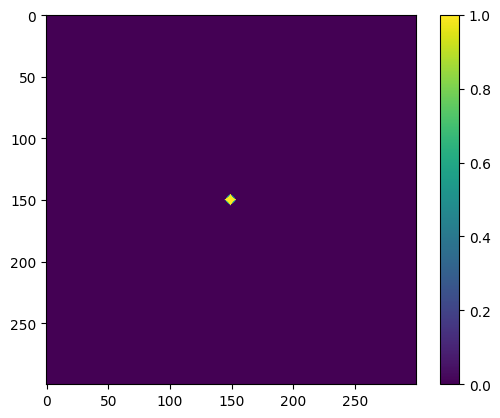

In [ ]:
size = 300
alpha = 0.5
alphaFacet = 0.8

lat = Lattice(size, size)

q = 1
lat.initiate(5)
for e in range(500):
    lat.update_supersat()

for i in range(10000):
    print(i)
    if i % 10 == 0:
        plt.imshow(lat.lattice, cmap='viridis')
        plt.colorbar()
        plt.show(block=False)
        plt.close()  # close the image window

    for e in range(50):
        lat.update_supersat()
    lat.update_FB()
    lat.update_cells()
    if i % 10 == 9:
        lat.save(str(q + 1))

    q += 1